---
title: Visualization & Figure Creation (ipynb)
description: Creating static figures using Seaborn
authors:
  - name: Steve Purves
    orcid: 0000-0002-0760-5497
date: '2023-01-12T21:04:04.332Z'
---

## Main Timeline Figure

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")

In [2]:
def make_category_columns(df):
    df['Depth'] = 'Shallow (<18km)'
    df.loc[(df['Depth(km)'] >= 18) & (df['Depth(km)'] <= 28), 'Depth'] = 'Interchange (18km>x>28km)'
    df.loc[df['Depth(km)'] >= 28, 'Depth'] = 'Deep (>28km)'
    
    df['Mag'] = 0
    df.loc[(df['Magnitude'] >= 1) & (df['Magnitude'] <= 2), 'Mag'] = 1
    df.loc[(df['Magnitude'] >= 2) & (df['Magnitude'] <= 3), 'Mag'] = 2
    df.loc[(df['Magnitude'] >= 3) & (df['Magnitude'] <= 4), 'Mag'] = 3
    df.loc[(df['Magnitude'] >= 4) & (df['Magnitude'] <= 5), 'Mag'] = 4    
    
    return df

## Visualising Long term earthquake data

Data taken directly from the IGN Catalog and processed using the [data screening notebook](data-screening.ipynb).

In [3]:
df_ign = pd.read_csv('../data/lapalma_ign.csv')
df_ign = make_category_columns(df_ign)
df_ign.head()

Event        Date      Time  Latitude  Longitude  Depth(km)  \
0   es2017eugju  2017-03-09  23:44:06   28.5346   -17.8349       26.0   
1   es2017euhlh  2017-03-10  00:16:10   28.5491   -17.8459       27.0   
2   es2017cpaoh  2017-03-10  00:16:11   28.5008   -17.8863       20.0   
3   es2017eunnk  2017-03-10  03:20:26   28.5204   -17.8657       30.0   
4   es2017kajei  2017-08-21  02:06:55   28.5985   -17.7156        0.0   

      Intensity  Magnitude  Type Mag                        Location  \
0                      1.6         4  NE FUENCALIENTE DE LA PALMA.IL   
1                      2.0         4  N FUENCALIENTE DE LA PALMA.ILP   
2                      2.1         4              W LOS CANARIOS.ILP   
3                      1.6         4  NW FUENCALIENTE DE LA PALMA.IL   
4                      1.6         4                 E EL PUEBLO.ILP   

              DateTime            Timestamp  Swarm  Phase  \
0  2017-03-09 23:44:06  1489103046000000000    0.0      0   
1  2017-03-10 00:16:10  1489104970000000000    0.0      0   
2  2017-03-10 00:16:11  1489104971000000000    0.0      0   
3  2017-03-10 03:20:26  1489116026000000000    0.0      0   
4  2017-08-21 02:06:55  1503281215000000000    0.0      0   

                       Depth  Mag  
0  Interchange (18km>x>28km)    1  
1  Interchange (18km>x>28km)    2  
2  Interchange (18km>x>28km)    2  
3               Deep (>28km)    1  
4            Shallow (<18km)    1

In [4]:
df_ign['DateTime'] = pd.to_datetime(df_ign['Date'] + ' ' + df_ign['Time'])
df_ign['DateTime']

0       2017-03-09 23:44:06
1       2017-03-10 00:16:10
2       2017-03-10 00:16:11
3       2017-03-10 03:20:26
4       2017-08-21 02:06:55
                ...        
11342   2022-09-14 00:20:51
11343   2022-09-14 01:40:30
11344   2022-09-14 01:44:52
11345   2022-09-14 02:03:08
11346   2022-09-14 03:58:59
Name: DateTime, Length: 11347, dtype: datetime64[ns]

In [5]:
df_ign_early = df_ign[df_ign['DateTime'] < '2021-09-11']
df_ign_pre = df_ign[(df_ign['DateTime'] >= '2021-09-11')&(df_ign['DateTime'] < '2021-09-19 14:13:00')]
df_ign_phase1 = df_ign[(df_ign['DateTime'] >= '2021-09-19 14:13:00')&(df_ign['DateTime'] < '2021-10-01')]
df_ign_phase2 = df_ign[(df_ign['DateTime'] >= '2021-10-01')&(df_ign['DateTime'] < '2021-12-01')]
df_ign_phase3 = df_ign[(df_ign['DateTime'] >= '2021-12-01')&(df_ign['DateTime'] <= '2021-12-31')]

df_erupt = df_ign[(df_ign['Date'] < '2022-01-01') & (df_ign['Date'] > '2021-09-11')]

df_erupt_1 = df_erupt[df_erupt['Magnitude'] < 1.0]
df_erupt_2 = df_erupt[(df_erupt['Magnitude'] >= 1.0)&(df_erupt['Magnitude'] < 2.0)]
df_erupt_3 = df_erupt[(df_erupt['Magnitude'] >= 2.0)&(df_erupt['Magnitude'] < 3.0)]
df_erupt_4 = df_erupt[(df_erupt['Magnitude'] >= 3.0)&(df_erupt['Magnitude'] < 4.0)]
df_erupt_5 = df_erupt[df_erupt['Magnitude'] > 4.0]


In [6]:
tab10_colors = (
    (0.12156862745098039, 0.4666666666666667,  0.7058823529411765  ),  # 1f77b4
    (1.0,                 0.4980392156862745,  0.054901960784313725),  # ff7f0e
    (0.17254901960784313, 0.6274509803921569,  0.17254901960784313 ),  # 2ca02c
    (0.8392156862745098,  0.15294117647058825, 0.1568627450980392  ),  # d62728
    (0.5803921568627451,  0.403921568627451,   0.7411764705882353  ),  # 9467bd
    (0.5490196078431373,  0.33725490196078434, 0.29411764705882354 ),  # 8c564b
    (0.8901960784313725,  0.4666666666666667,  0.7607843137254902  ),  # e377c2
    (0.4980392156862745,  0.4980392156862745,  0.4980392156862745  ),  # 7f7f7f
    (0.7372549019607844,  0.7411764705882353,  0.13333333333333333 ),  # bcbd22
    (0.09019607843137255, 0.7450980392156863,  0.8117647058823529),    # 17becf
)

tab20_colors = (
    (0.12156862745098039, 0.4666666666666667,  0.7058823529411765  ),  # 1f77b4
    (0.6823529411764706,  0.7803921568627451,  0.9098039215686274  ),  # aec7e8
    (1.0,                 0.4980392156862745,  0.054901960784313725),  # ff7f0e
    (1.0,                 0.7333333333333333,  0.47058823529411764 ),  # ffbb78
    (0.17254901960784313, 0.6274509803921569,  0.17254901960784313 ),  # 2ca02c
    (0.596078431372549,   0.8745098039215686,  0.5411764705882353  ),  # 98df8a
    (0.8392156862745098,  0.15294117647058825, 0.1568627450980392  ),  # d62728
    (1.0,                 0.596078431372549,   0.5882352941176471  ),  # ff9896
    (0.5803921568627451,  0.403921568627451,   0.7411764705882353  ),  # 9467bd
    (0.7725490196078432,  0.6901960784313725,  0.8352941176470589  ),  # c5b0d5
    (0.5490196078431373,  0.33725490196078434, 0.29411764705882354 ),  # 8c564b
    (0.7686274509803922,  0.611764705882353,   0.5803921568627451  ),  # c49c94
    (0.8901960784313725,  0.4666666666666667,  0.7607843137254902  ),  # e377c2
    (0.9686274509803922,  0.7137254901960784,  0.8235294117647058  ),  # f7b6d2
    (0.4980392156862745,  0.4980392156862745,  0.4980392156862745  ),  # 7f7f7f
    (0.7803921568627451,  0.7803921568627451,  0.7803921568627451  ),  # c7c7c7
    (0.7372549019607844,  0.7411764705882353,  0.13333333333333333 ),  # bcbd22
    (0.8588235294117647,  0.8588235294117647,  0.5529411764705883  ),  # dbdb8d
    (0.09019607843137255, 0.7450980392156863,  0.8117647058823529  ),  # 17becf
    (0.6196078431372549,  0.8549019607843137,  0.8980392156862745),    # 9edae5
)

tab20c_colors = (
    (0.19215686274509805, 0.5098039215686274,  0.7411764705882353  ),  # 3182bd
    (0.4196078431372549,  0.6823529411764706,  0.8392156862745098  ),  # 6baed6
    (0.6196078431372549,  0.792156862745098,   0.8823529411764706  ),  # 9ecae1
    (0.7764705882352941,  0.8588235294117647,  0.9372549019607843  ),  # c6dbef
    (0.9019607843137255,  0.3333333333333333,  0.050980392156862744),  # e6550d
    (0.9921568627450981,  0.5529411764705883,  0.23529411764705882 ),  # fd8d3c
    (0.9921568627450981,  0.6823529411764706,  0.4196078431372549  ),  # fdae6b
    (0.9921568627450981,  0.8156862745098039,  0.6352941176470588  ),  # fdd0a2
    (0.19215686274509805, 0.6392156862745098,  0.32941176470588235 ),  # 31a354
    (0.4549019607843137,  0.7686274509803922,  0.4627450980392157  ),  # 74c476
    (0.6313725490196078,  0.8509803921568627,  0.6078431372549019  ),  # a1d99b
    (0.7803921568627451,  0.9137254901960784,  0.7529411764705882  ),  # c7e9c0
    (0.4588235294117647,  0.4196078431372549,  0.6941176470588235  ),  # 756bb1
    (0.6196078431372549,  0.6039215686274509,  0.7843137254901961  ),  # 9e9ac8
    (0.7372549019607844,  0.7411764705882353,  0.8627450980392157  ),  # bcbddc
    (0.8549019607843137,  0.8549019607843137,  0.9215686274509803  ),  # dadaeb
    (0.38823529411764707, 0.38823529411764707, 0.38823529411764707 ),  # 636363
    (0.5882352941176471,  0.5882352941176471,  0.5882352941176471  ),  # 969696
    (0.7411764705882353,  0.7411764705882353,  0.7411764705882353  ),  # bdbdbd
    (0.8509803921568627,  0.8509803921568627,  0.8509803921568627  ),  # d9d9d9
)

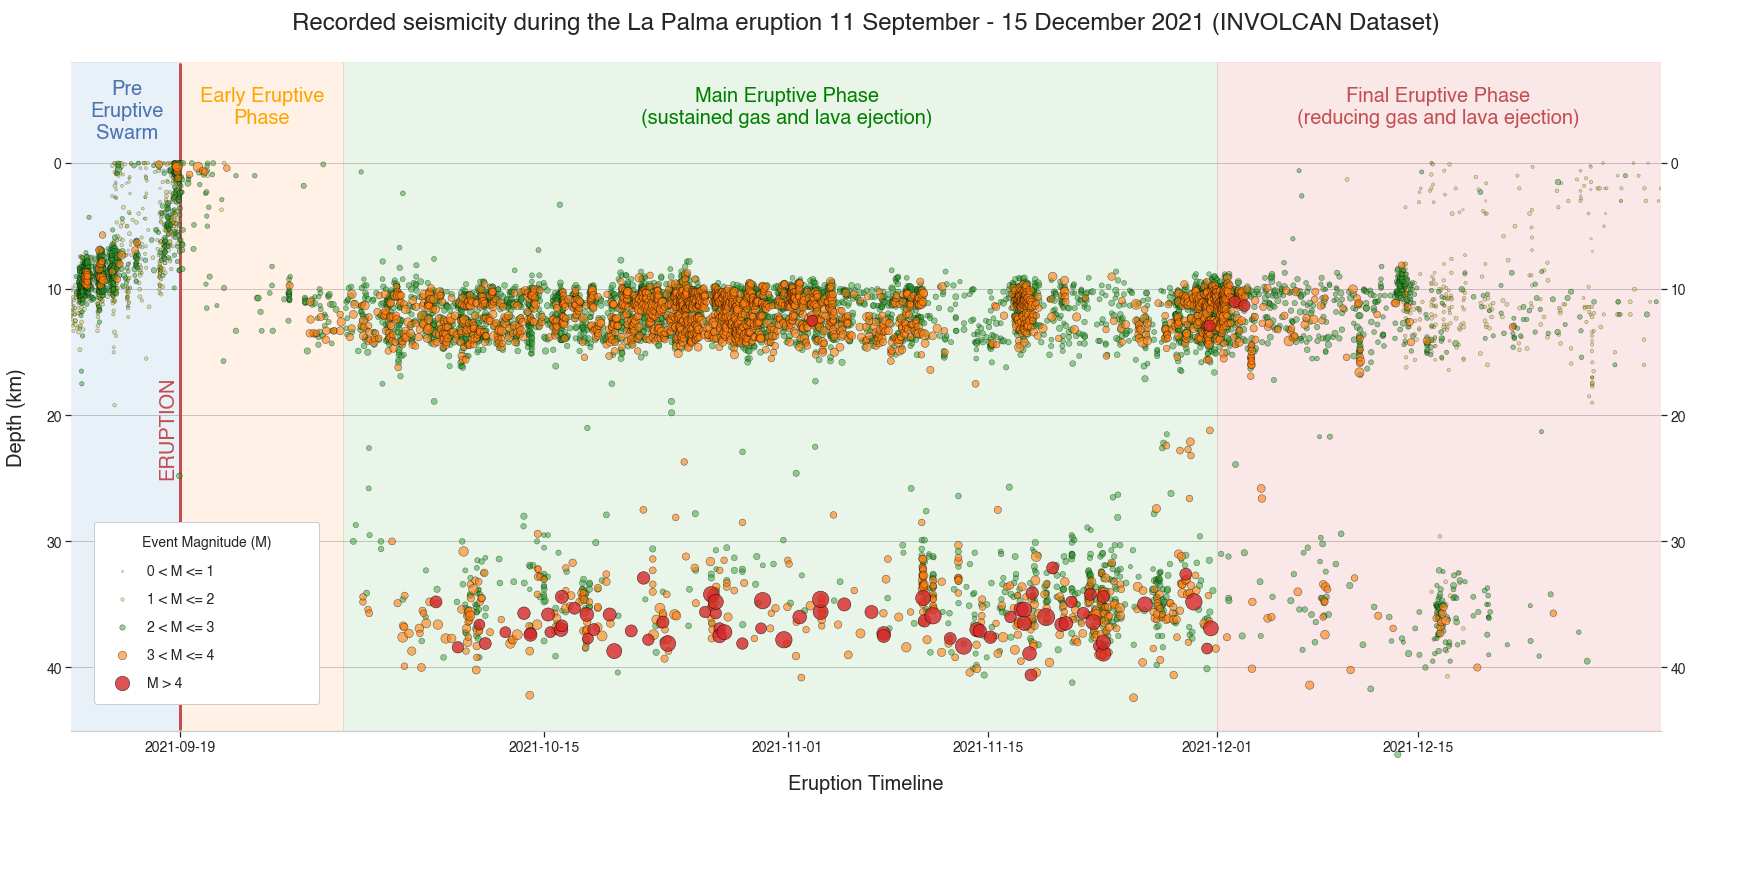

In [7]:
#| label: eq-timeline

from matplotlib.patches import Rectangle

import datetime as dt
from matplotlib.dates import date2num, num2date

matplotlib.rcParams['font.sans-serif'] = "Helvetica"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['ytick.labelleft'] = True
matplotlib.rcParams['ytick.labelright'] = True

%matplotlib inline
fig = matplotlib.pyplot.figure(figsize=(24,12))
fig.tight_layout()
# Creating axis
# add_axes([xmin,ymin,dx,dy])
ax_min = fig.add_axes([0.01, 0.01, 0.01, 0.01])
ax_min.axis('off')
ax_max = fig.add_axes([0.99, 0.99, 0.01, 0.01])
ax_max.axis('off')

ax_timeline = fig.add_axes([0.04, 0.1, 0.92, 0.85])
ax_timeline.spines["top"].set_visible(False)
ax_timeline.spines["right"].set_visible(False)
ax_timeline.spines["left"].set_visible(False)
ax_timeline.grid(axis='x')


ax_timeline.axvline(x=dt.datetime(2021, 9, 19, 14, 13), ymin=0.075, ymax=0.98, color='r', linewidth=3)


def make_scatter(df, c, alpha=0.8):
    M = 3*np.exp2(1.3*df['Magnitude'])
    return ax_timeline.scatter(df['DateTime'], df['Depth(km)'], s=M, c=c, alpha=alpha, edgecolor='black', linewidth=0.5, zorder=2);

# make_scatter(df_erupt, c=tab20c_colors[-1])
points_1 = make_scatter(df_erupt_1, c=[tab20_colors[12]], alpha=0.3)
points_2 = make_scatter(df_erupt_2, c=[tab20_colors[16]], alpha=0.4)
points_3 = make_scatter(df_erupt_3, c=[tab20_colors[4]], alpha=0.5)
points_4 = make_scatter(df_erupt_4, c=[tab20_colors[2]], alpha=0.6)
points_5 = make_scatter(df_erupt_5, c=[tab20_colors[6]], alpha=0.8)

ax_timeline.tick_params(axis='x', labelrotation=0, bottom=True)
ax_timeline.set_ylabel('')
ax_timeline.yaxis.set_ticks_position('both')
ax_timeline.yaxis.set_ticks_position('both')

xticks = ax_timeline.get_xticks()
new_xticks = [date2num(pd.to_datetime('2021-09-11')),
    date2num(pd.to_datetime('2021-09-19 14:13:00'))]
new_xticks = np.append(new_xticks, xticks[2:-1])
ax_timeline.set_xticks(new_xticks)

ax_timeline.invert_yaxis()
ax_timeline.spines['bottom'].set_position(('data', 45))
ax_timeline.margins(tight=True, x=0)
ax_timeline.legend(
    [points_1, points_2, points_3, points_4, points_5],
    ['0 < M <= 1','1 < M <= 2','2 < M <= 3','3 < M <= 4','M > 4'],
    loc='lower left', bbox_to_anchor=(0.01, 0.1, 0.15, 0.1), fancybox=True,
    borderpad=1.0, labelspacing=1, mode="expand", title="Event Magnitude (M)",
    fontsize=14, title_fontsize=14, framealpha=1)

ax_timeline.set_ylim(ax_timeline.get_ylim()[0], -9)

plt.annotate('ERUPTION', (0.055, 0.42), rotation=90, xycoords='axes fraction', fontweight='bold', fontsize=20, color='r')
plt.annotate('Pre\nEruptive\nSwarm', (0.035, 0.88), rotation=0, xycoords='axes fraction', fontweight='bold', fontsize=20, color='b', horizontalalignment='center')
plt.annotate('Early Eruptive\nPhase', (0.12, 0.9), rotation=0, xycoords='axes fraction', fontweight='bold', fontsize=20, color='orange', horizontalalignment='center')
plt.annotate('Main Eruptive Phase\n(sustained gas and lava ejection)', (0.45, 0.9), rotation=0, xycoords='axes fraction', fontweight='bold', fontsize=20, color='green', horizontalalignment='center')
plt.annotate('Final Eruptive Phase\n(reducing gas and lava ejection)', (0.86, 0.9), rotation=0, xycoords='axes fraction', fontweight='bold', fontsize=20, color='r', horizontalalignment='center')

ax_timeline.add_patch(Rectangle((date2num(pd.to_datetime('2021-09-11')), -8), date2num(pd.to_datetime('2021-09-19 14:13:00'))-date2num(pd.to_datetime('2021-09-11')), 53, color=tab20_colors[0], zorder=1, alpha=0.1))
ax_timeline.add_patch(Rectangle((date2num(pd.to_datetime('2021-09-19 14:13:00')), -8), date2num(pd.to_datetime('2021-10-01'))-date2num(pd.to_datetime('2021-09-19 14:13:00')), 53, color=tab20_colors[2], zorder=1, alpha=0.1))
ax_timeline.add_patch(Rectangle((date2num(pd.to_datetime('2021-10-01')), -8), date2num(pd.to_datetime('2021-12-01'))-date2num(pd.to_datetime('2021-10-01')), 53, color=tab20_colors[4], zorder=1, alpha=0.1))
ax_timeline.add_patch(Rectangle((date2num(pd.to_datetime('2021-12-01')), -8), date2num(pd.to_datetime('2021-12-31'))-date2num(pd.to_datetime('2021-12-01'))+1, 53, color=tab20_colors[6], zorder=1, alpha=0.1));

ax_timeline.set_title("Recorded seismicity during the La Palma eruption 11 September - 15 December 2021 (INVOLCAN Dataset)", dict(fontsize=24), pad=20)
ax_timeline.set_ylabel("Depth (km)", dict(fontsize=20), labelpad=20)
ax_timeline.set_xlabel("Eruption Timeline", dict(fontsize=20), labelpad=20);

## Cumulative Distrubtion Plots

In [8]:
def cumulative_events_mag_depth(df, hue='Depth', kind='scatter', ax=None, dpi=300, palette=None, kde=True):
    matplotlib.rcParams['ytick.labelright'] = False
    g = sns.jointplot(x="Magnitude", y="Depth(km)", data=df,
                      kind=kind, hue=hue, height=10, space=0.1, marginal_ticks=False, ratio=8, alpha=0.6,
                      hue_order=['Shallow (<18km)', 'Interchange (18km>x>28km)', 'Deep (>28km)'],
                      ax=ax, palette=palette, ylim=(-2,50), xlim=(0.3,5.6), edgecolor=".2", marginal_kws=dict(bins=20, hist_kws={'edgecolor': 'black'}))
    if kde:
        g.plot_joint(sns.kdeplot, color="b", zorder=1, levels=15, ax=ax)
    g.fig.axes[0].invert_yaxis();
    g.fig.set_dpi(dpi)

    
def cumulative_events_spatial(df, hue='Depth', kind='scatter', ax=None, dpi=300, palette=None):
    g = sns.jointplot(x="Longitude", y="Depth(km)", data=df,
                      kind=kind, hue=hue, color="m", height=10, palette=palette,
                      hue_order=['Shallow (<18km)', 'Interchange (18km>x>28km)',  'Deep (>28km)', ], ax=ax, ylim=(-2,50))
    g.plot_joint(sns.kdeplot, color="b", zorder=1, levels=15, ax=ax)
    g.fig.axes[0].invert_yaxis();

/opt/homebrew/Caskroom/miniforge/base/envs/lapalma-earthquakes/lib/python3.10/site-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)


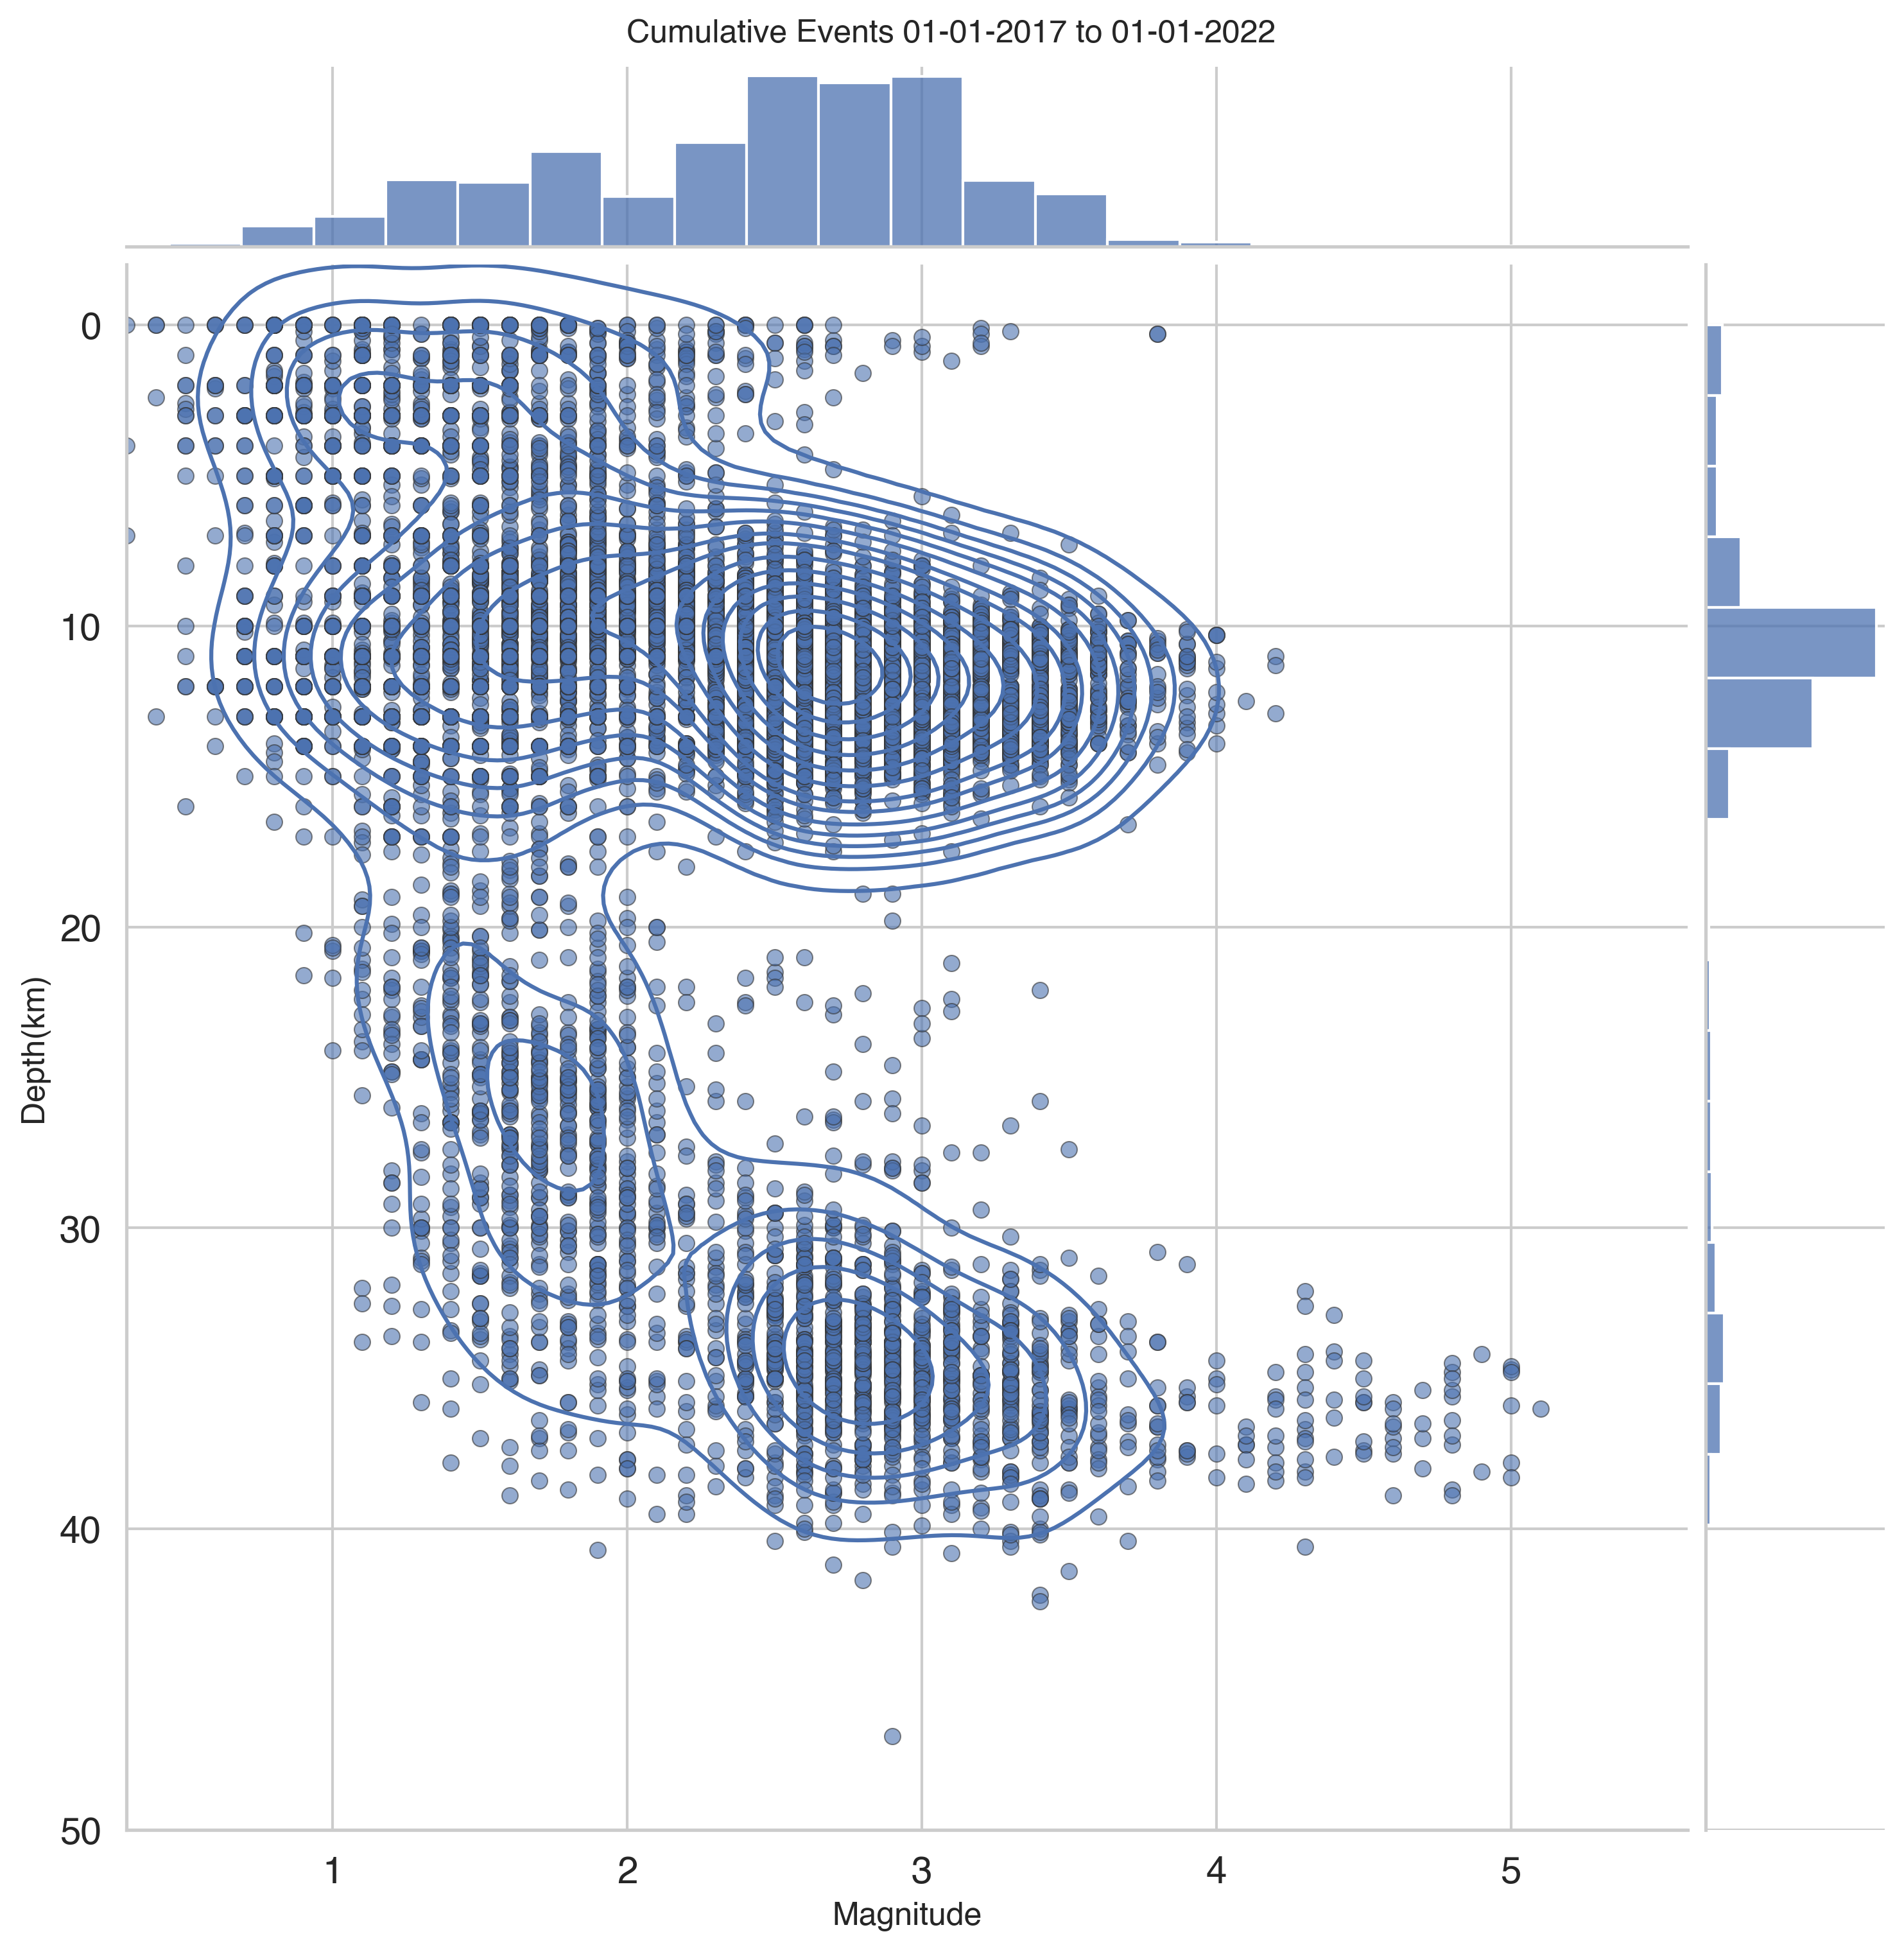

In [9]:
cumulative_events_mag_depth(df_ign, hue=None)
plt.suptitle('Cumulative Events 01-01-2017 to 01-01-2022', y=1.01);

/opt/homebrew/Caskroom/miniforge/base/envs/lapalma-earthquakes/lib/python3.10/site-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.01, 'Events prior to 2021-09-11 (785 events)')

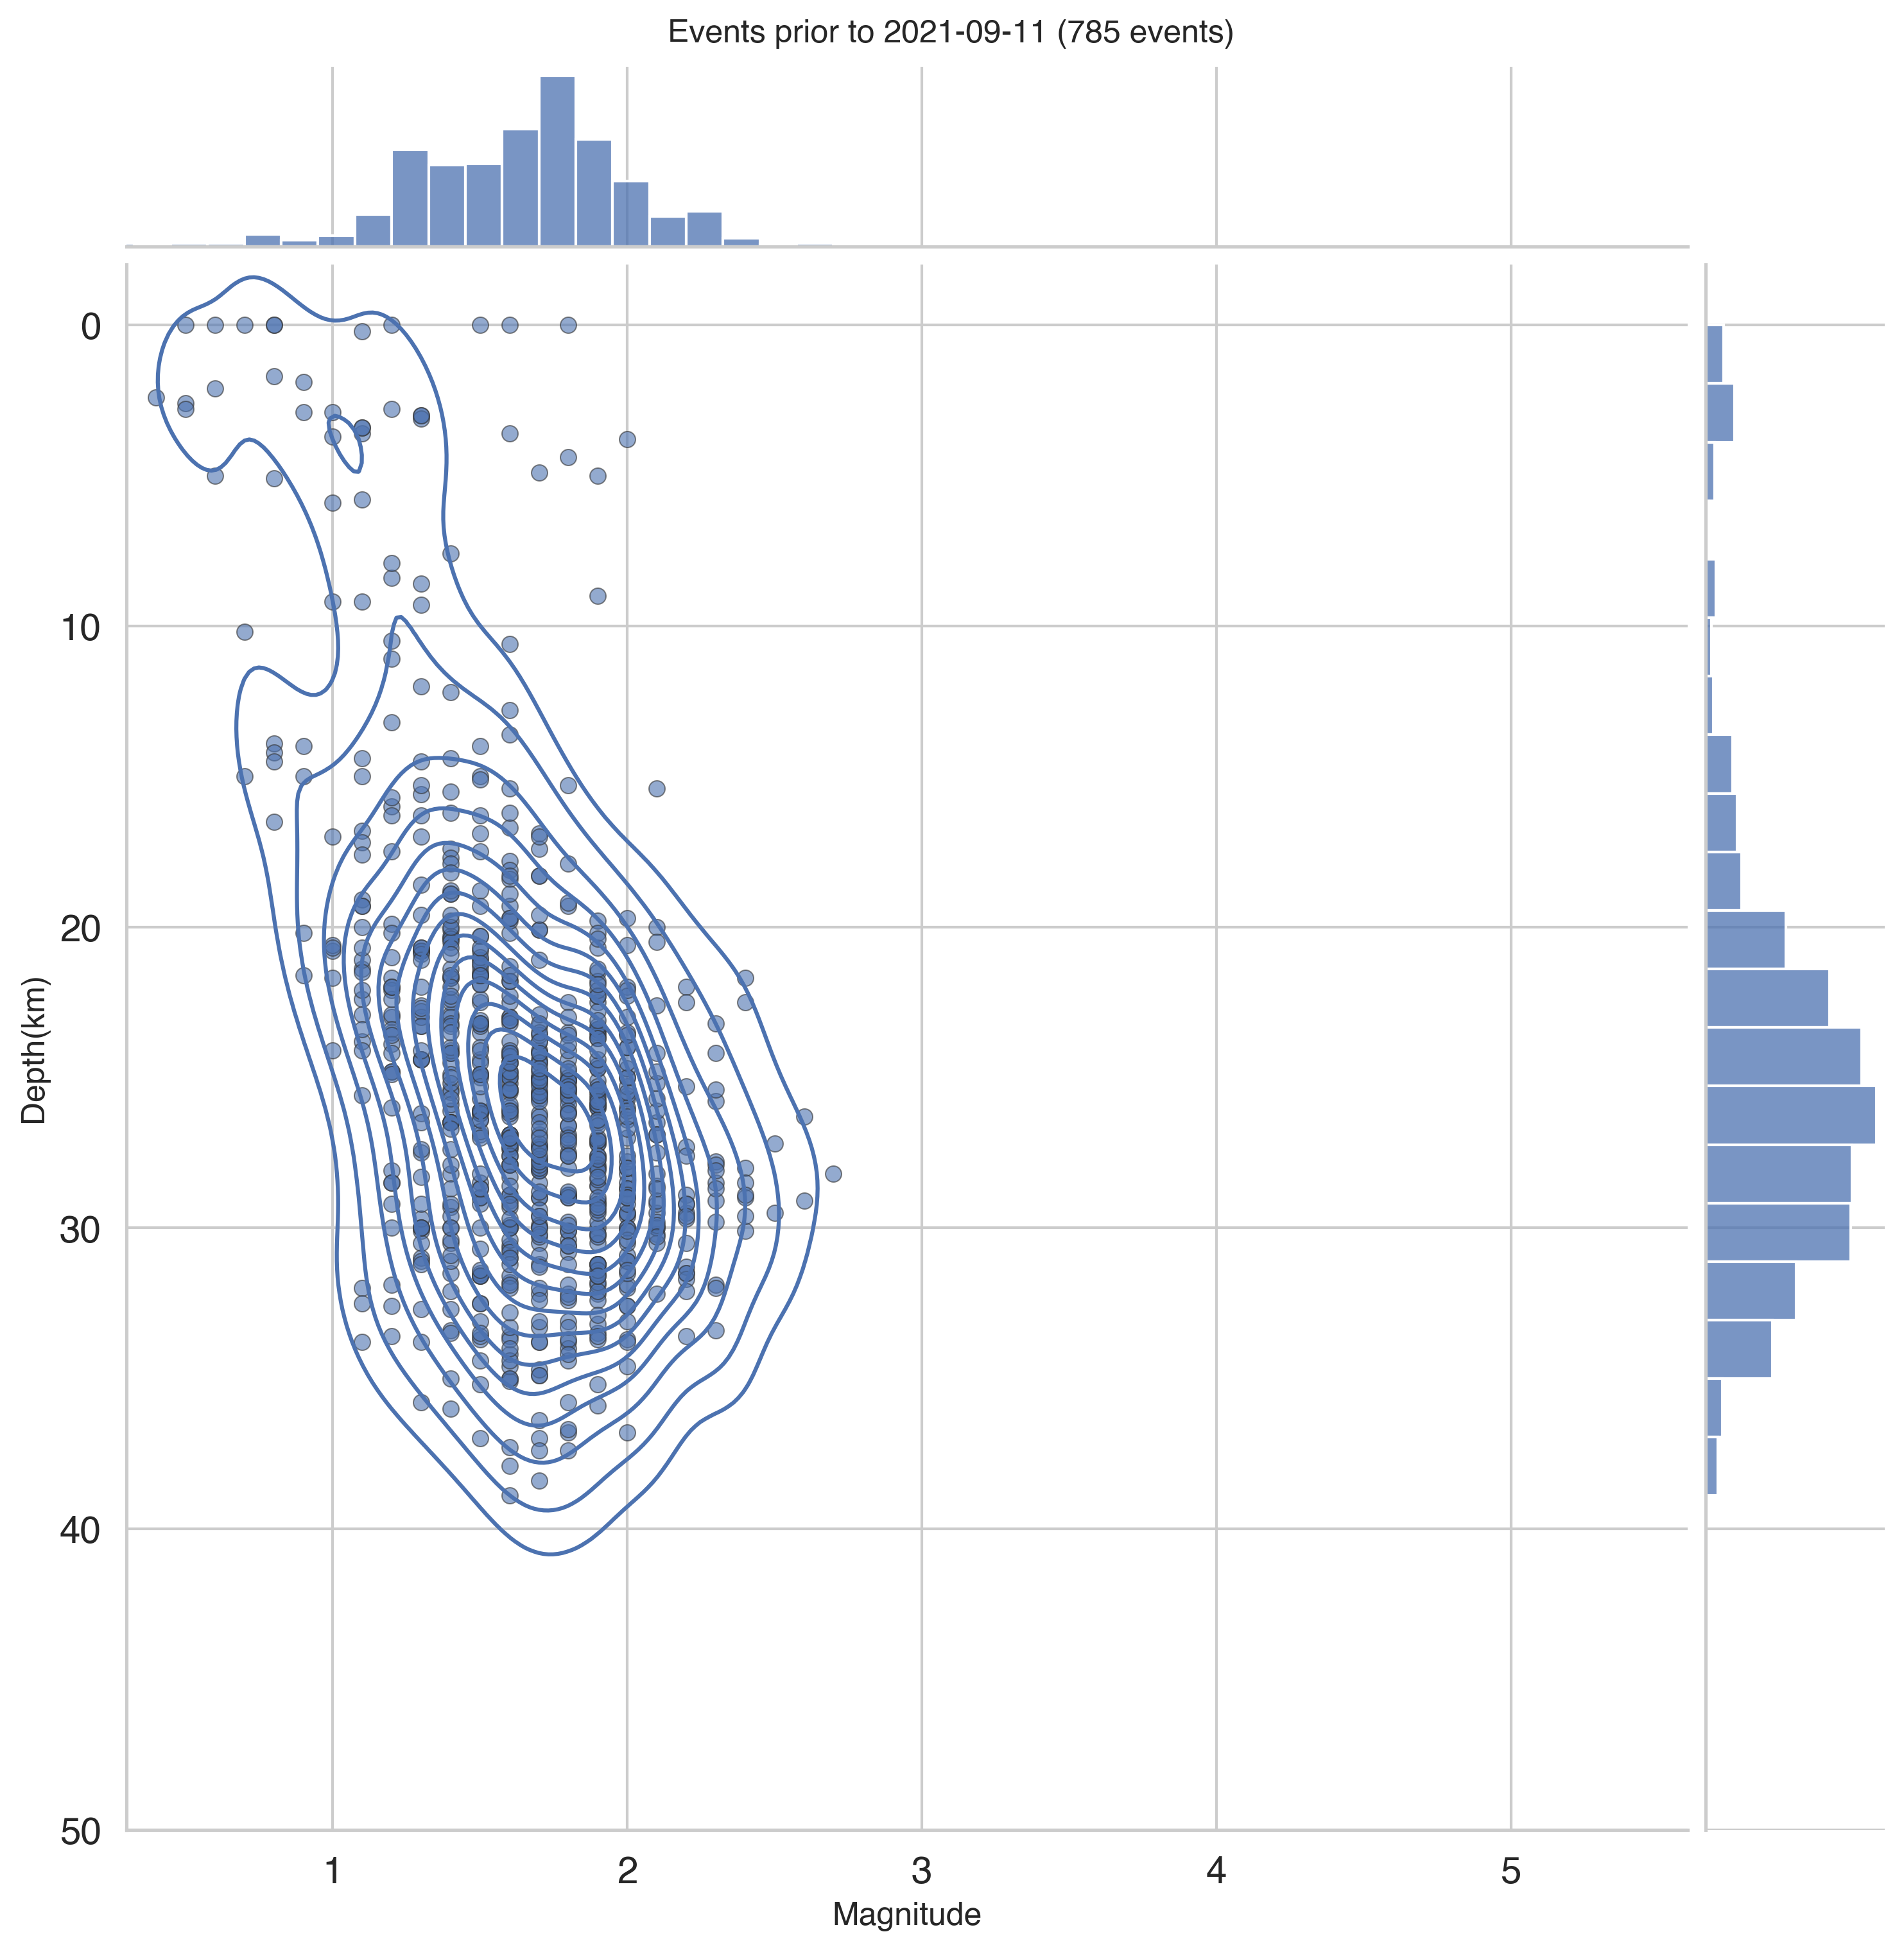

In [10]:
cumulative_events_mag_depth(df_ign_early, hue=None)
plt.suptitle(f'Events prior to 2021-09-11 ({len(df_ign_early.index)} events)', y=1.01)

/opt/homebrew/Caskroom/miniforge/base/envs/lapalma-earthquakes/lib/python3.10/site-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)


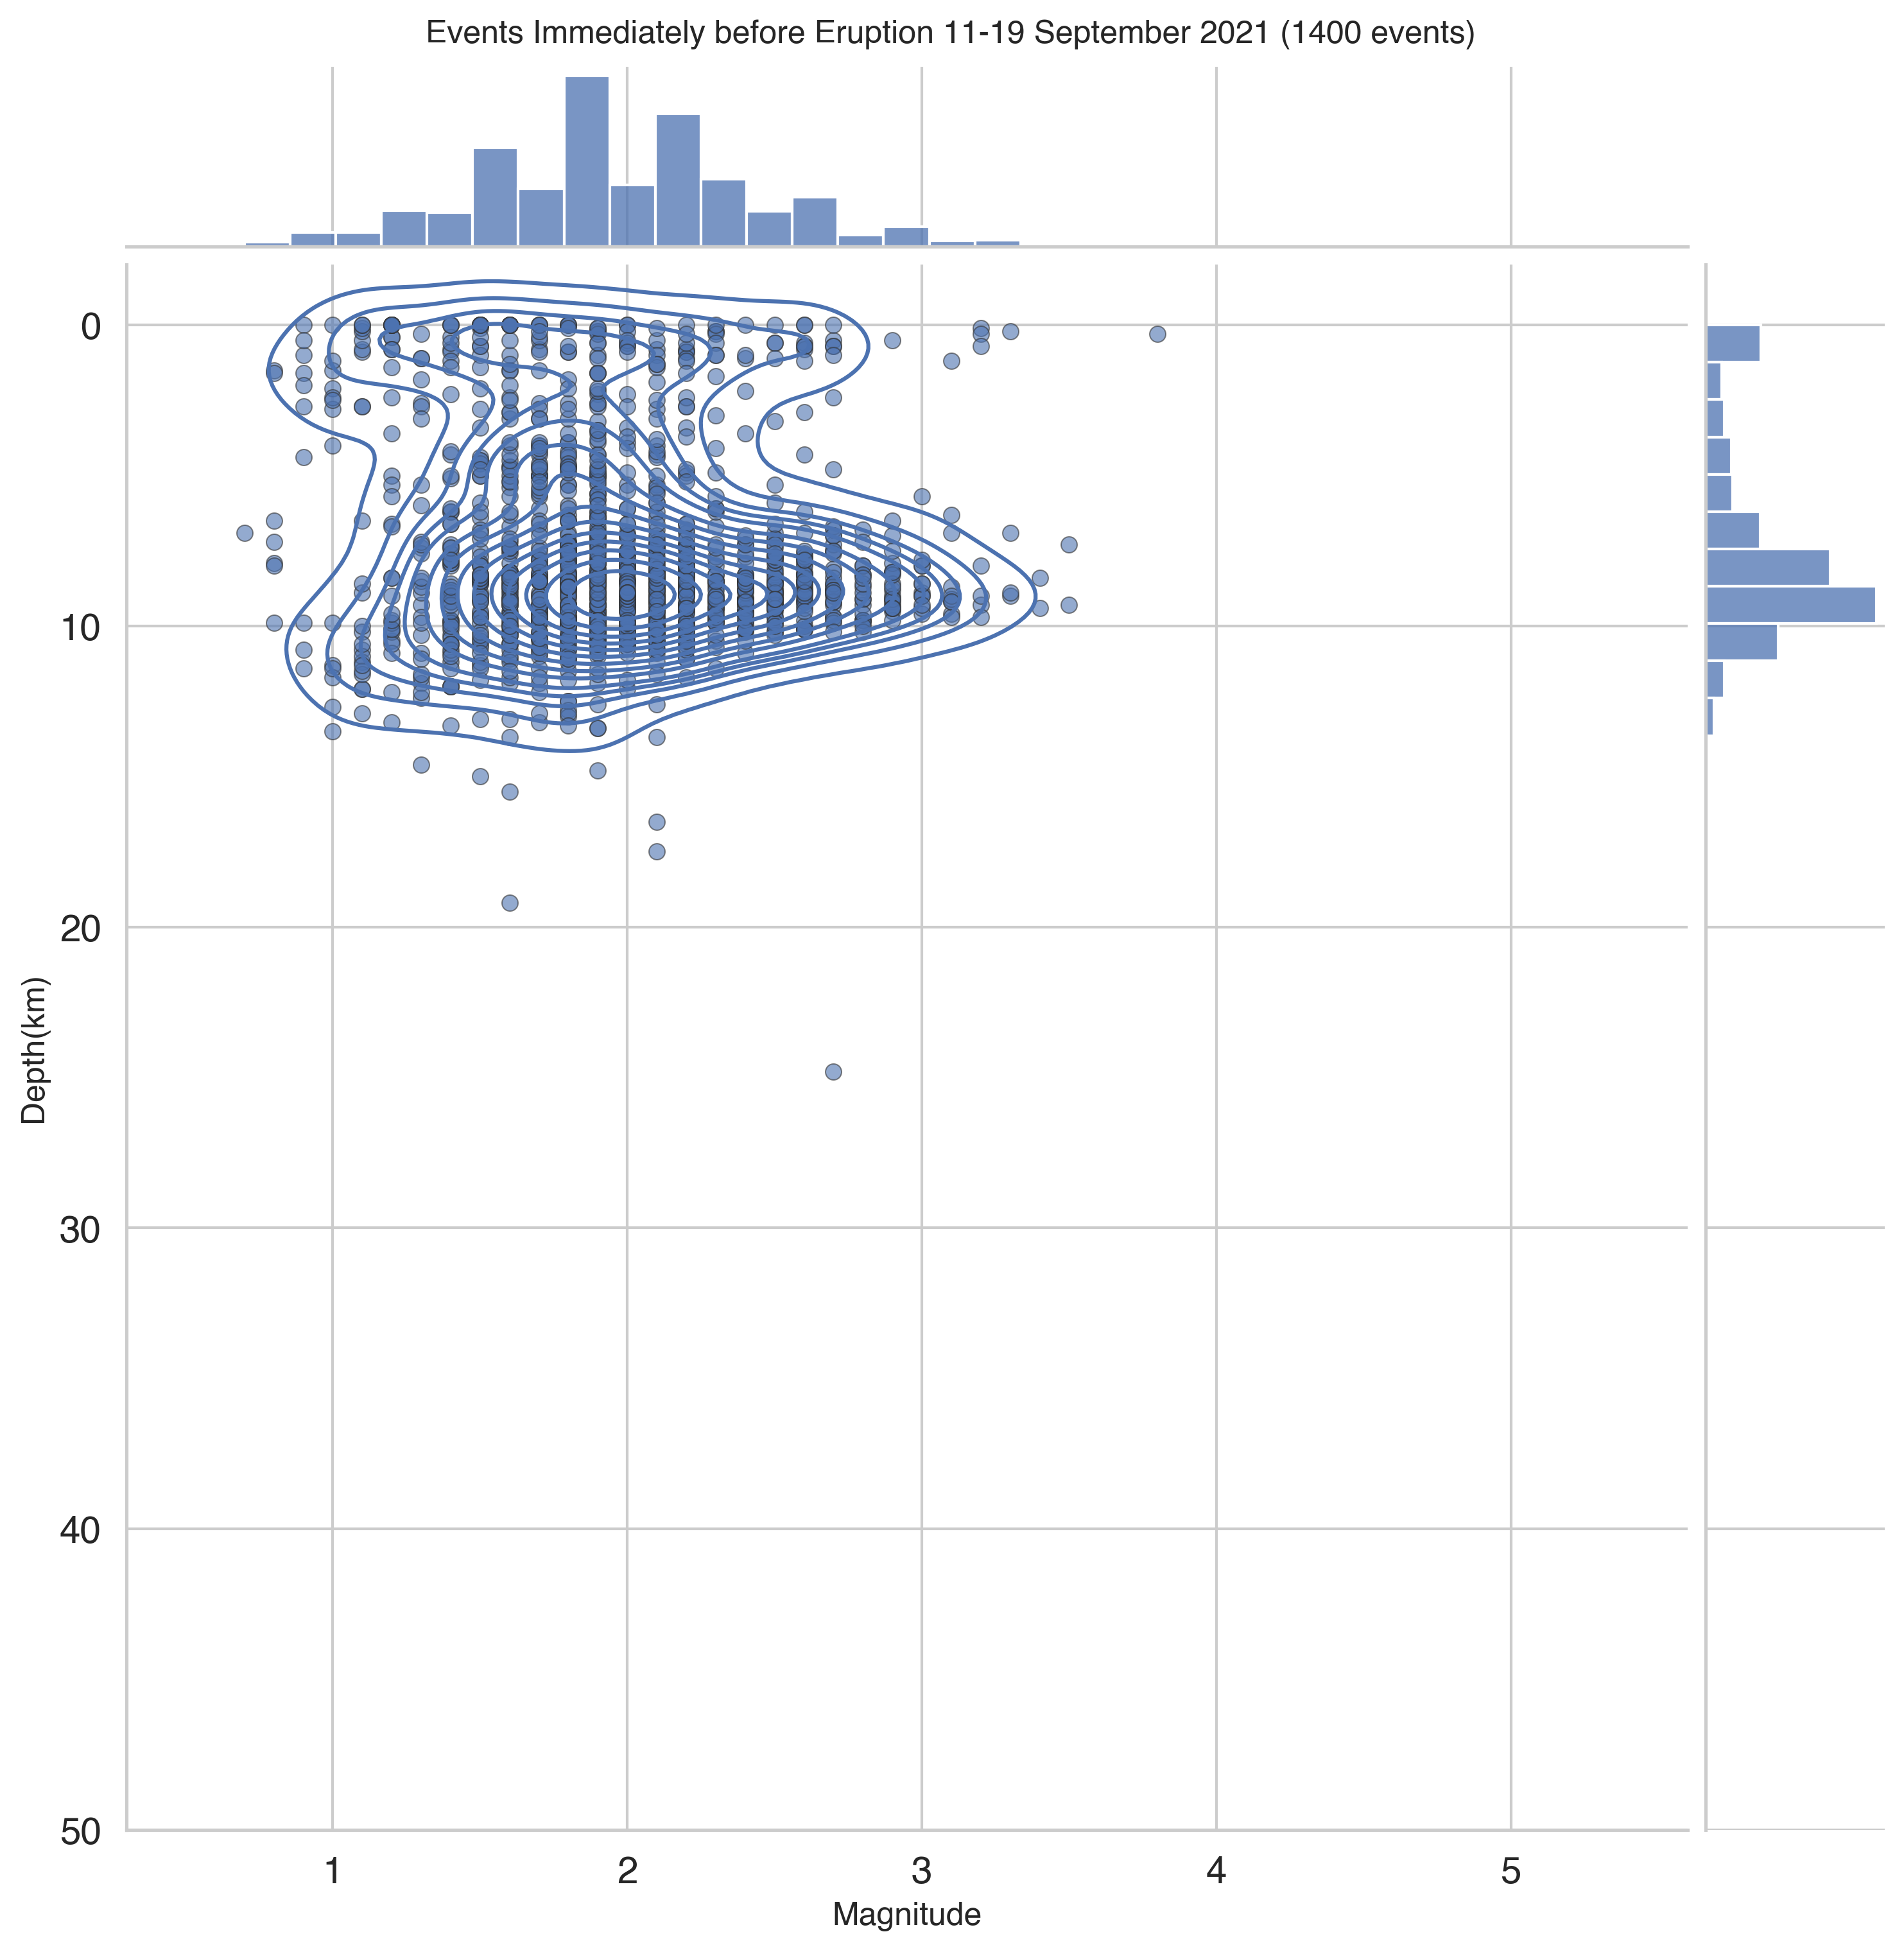

In [11]:
cumulative_events_mag_depth(df_ign_pre, hue=None)
plt.suptitle(f"Events Immediately before Eruption 11-19 September 2021 ({len(df_ign_pre.index)} events)", y=1.01);

/opt/homebrew/Caskroom/miniforge/base/envs/lapalma-earthquakes/lib/python3.10/site-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)


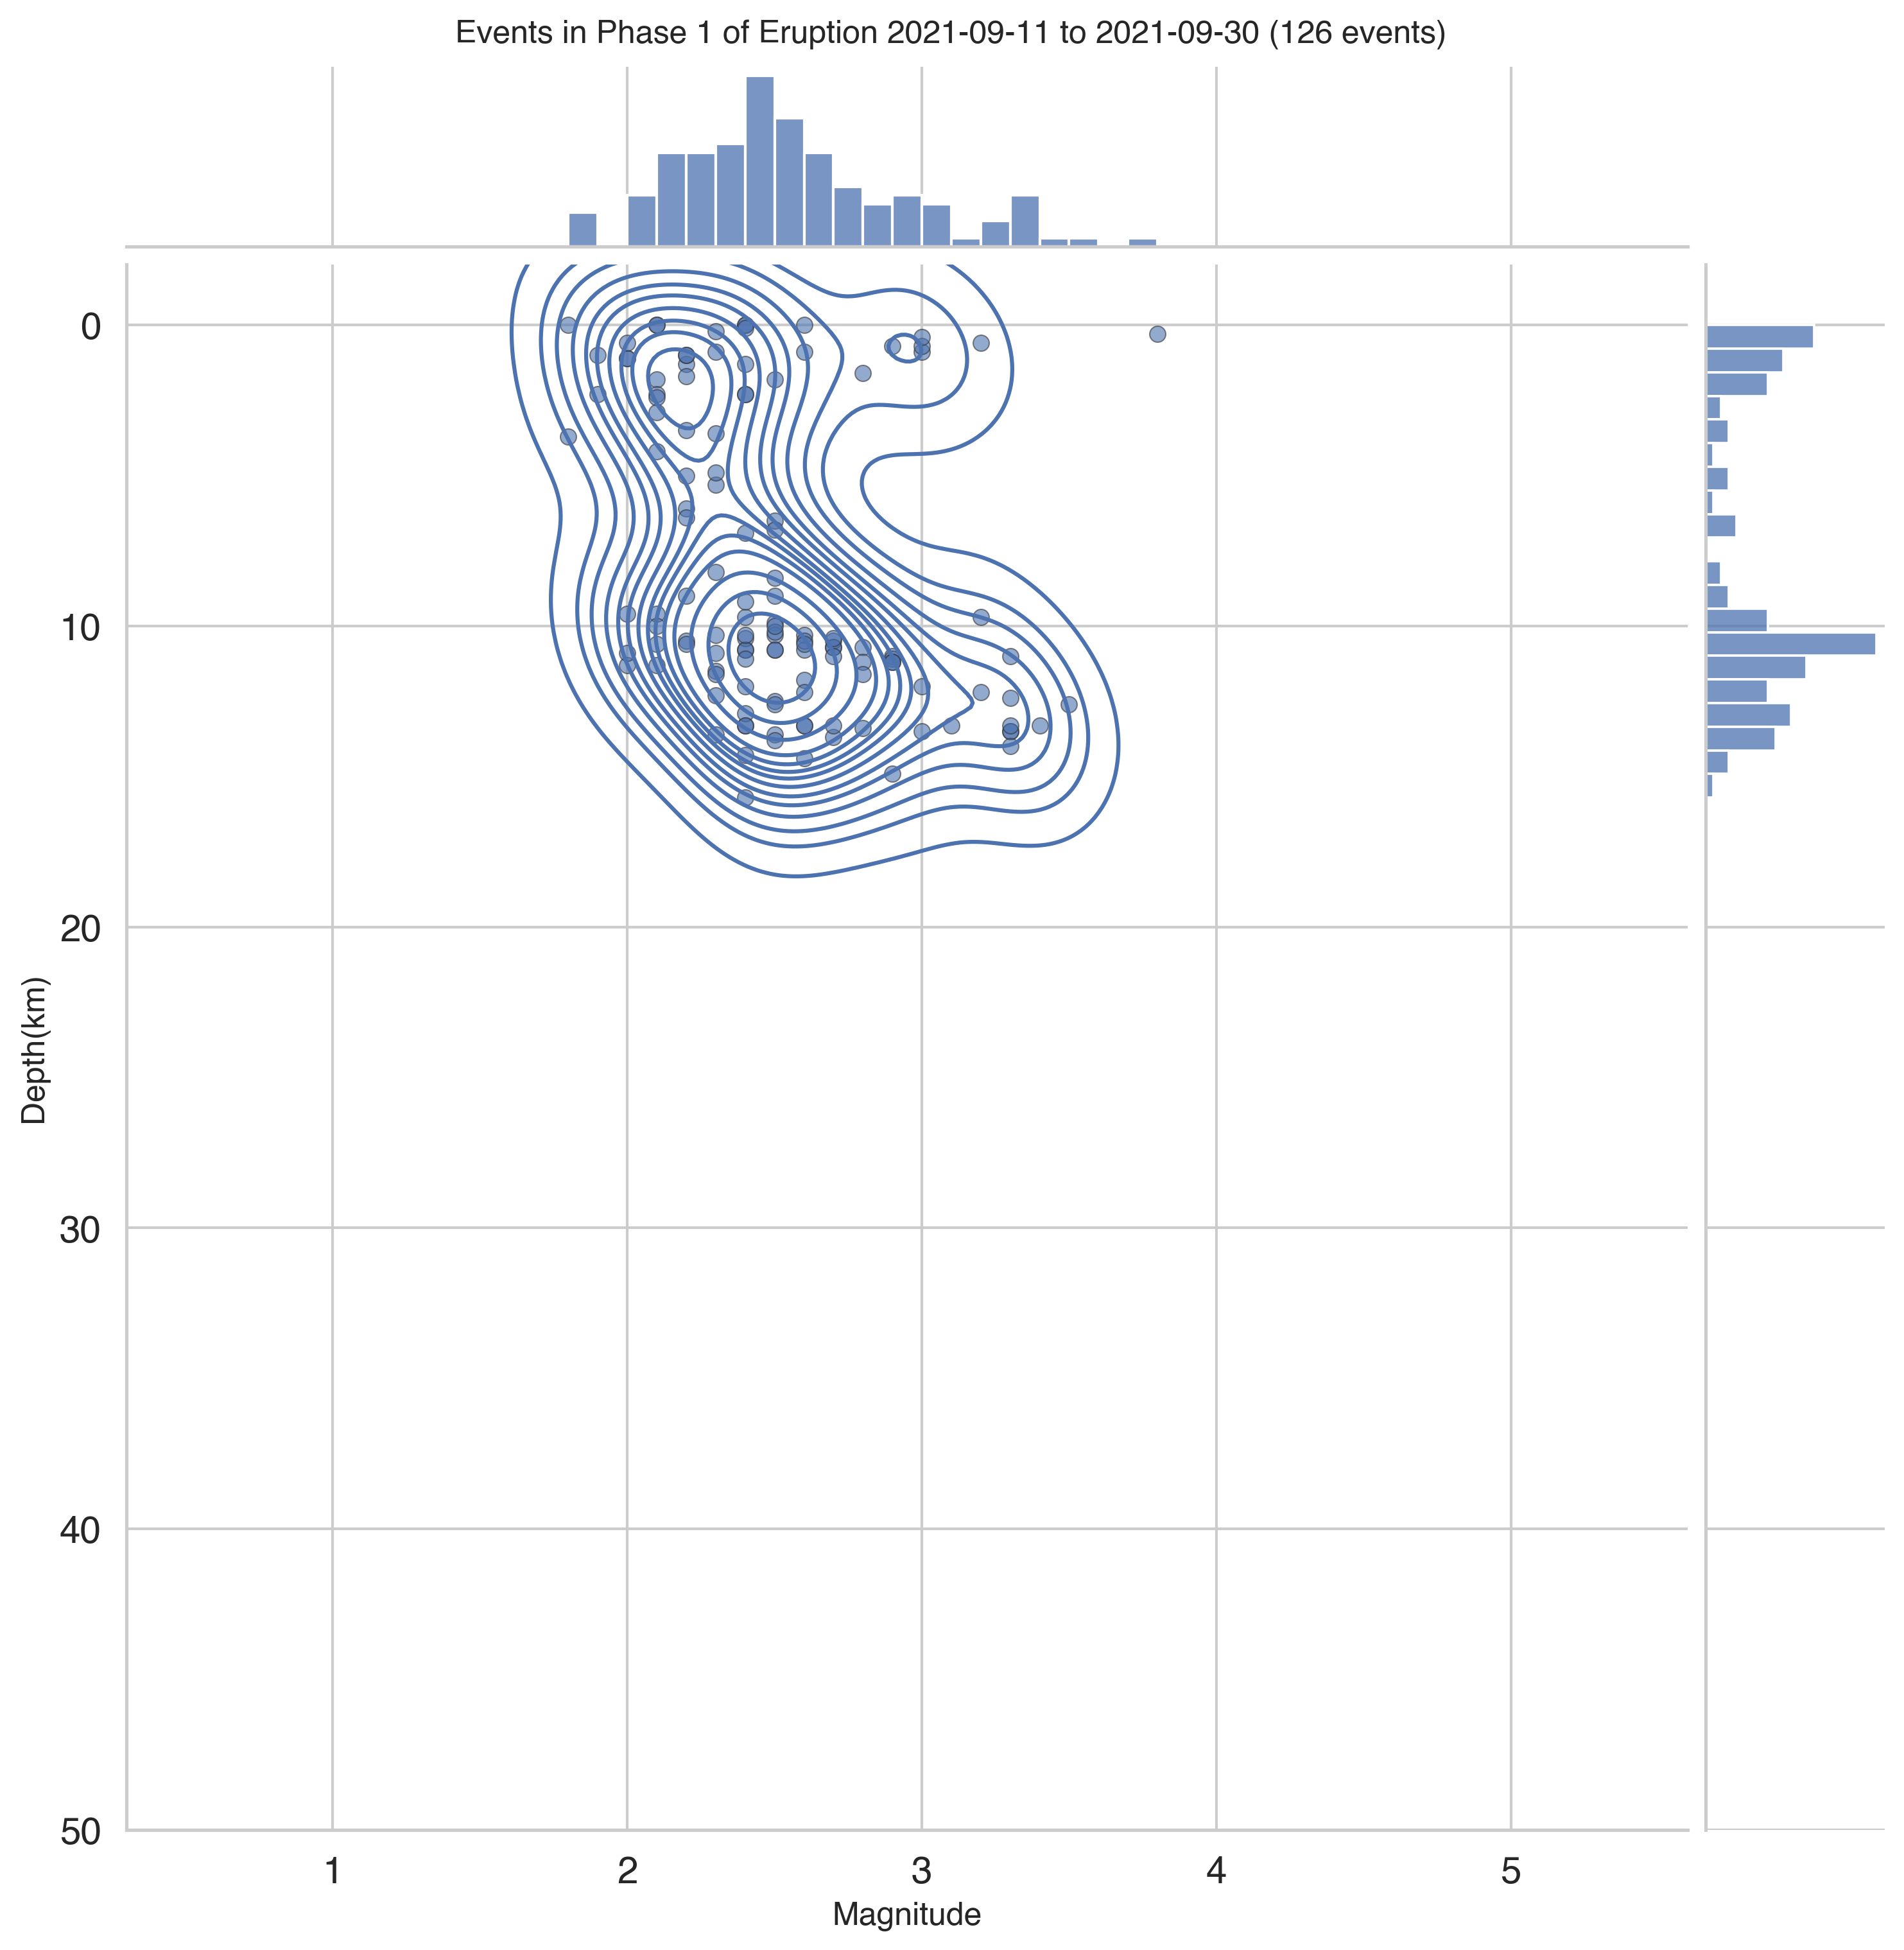

In [12]:
cumulative_events_mag_depth(df_ign_phase1, hue=None)
plt.suptitle(f"Events in Phase 1 of Eruption 2021-09-11 to 2021-09-30 ({len(df_ign_phase1.index)} events)", y=1.01);

/opt/homebrew/Caskroom/miniforge/base/envs/lapalma-earthquakes/lib/python3.10/site-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)


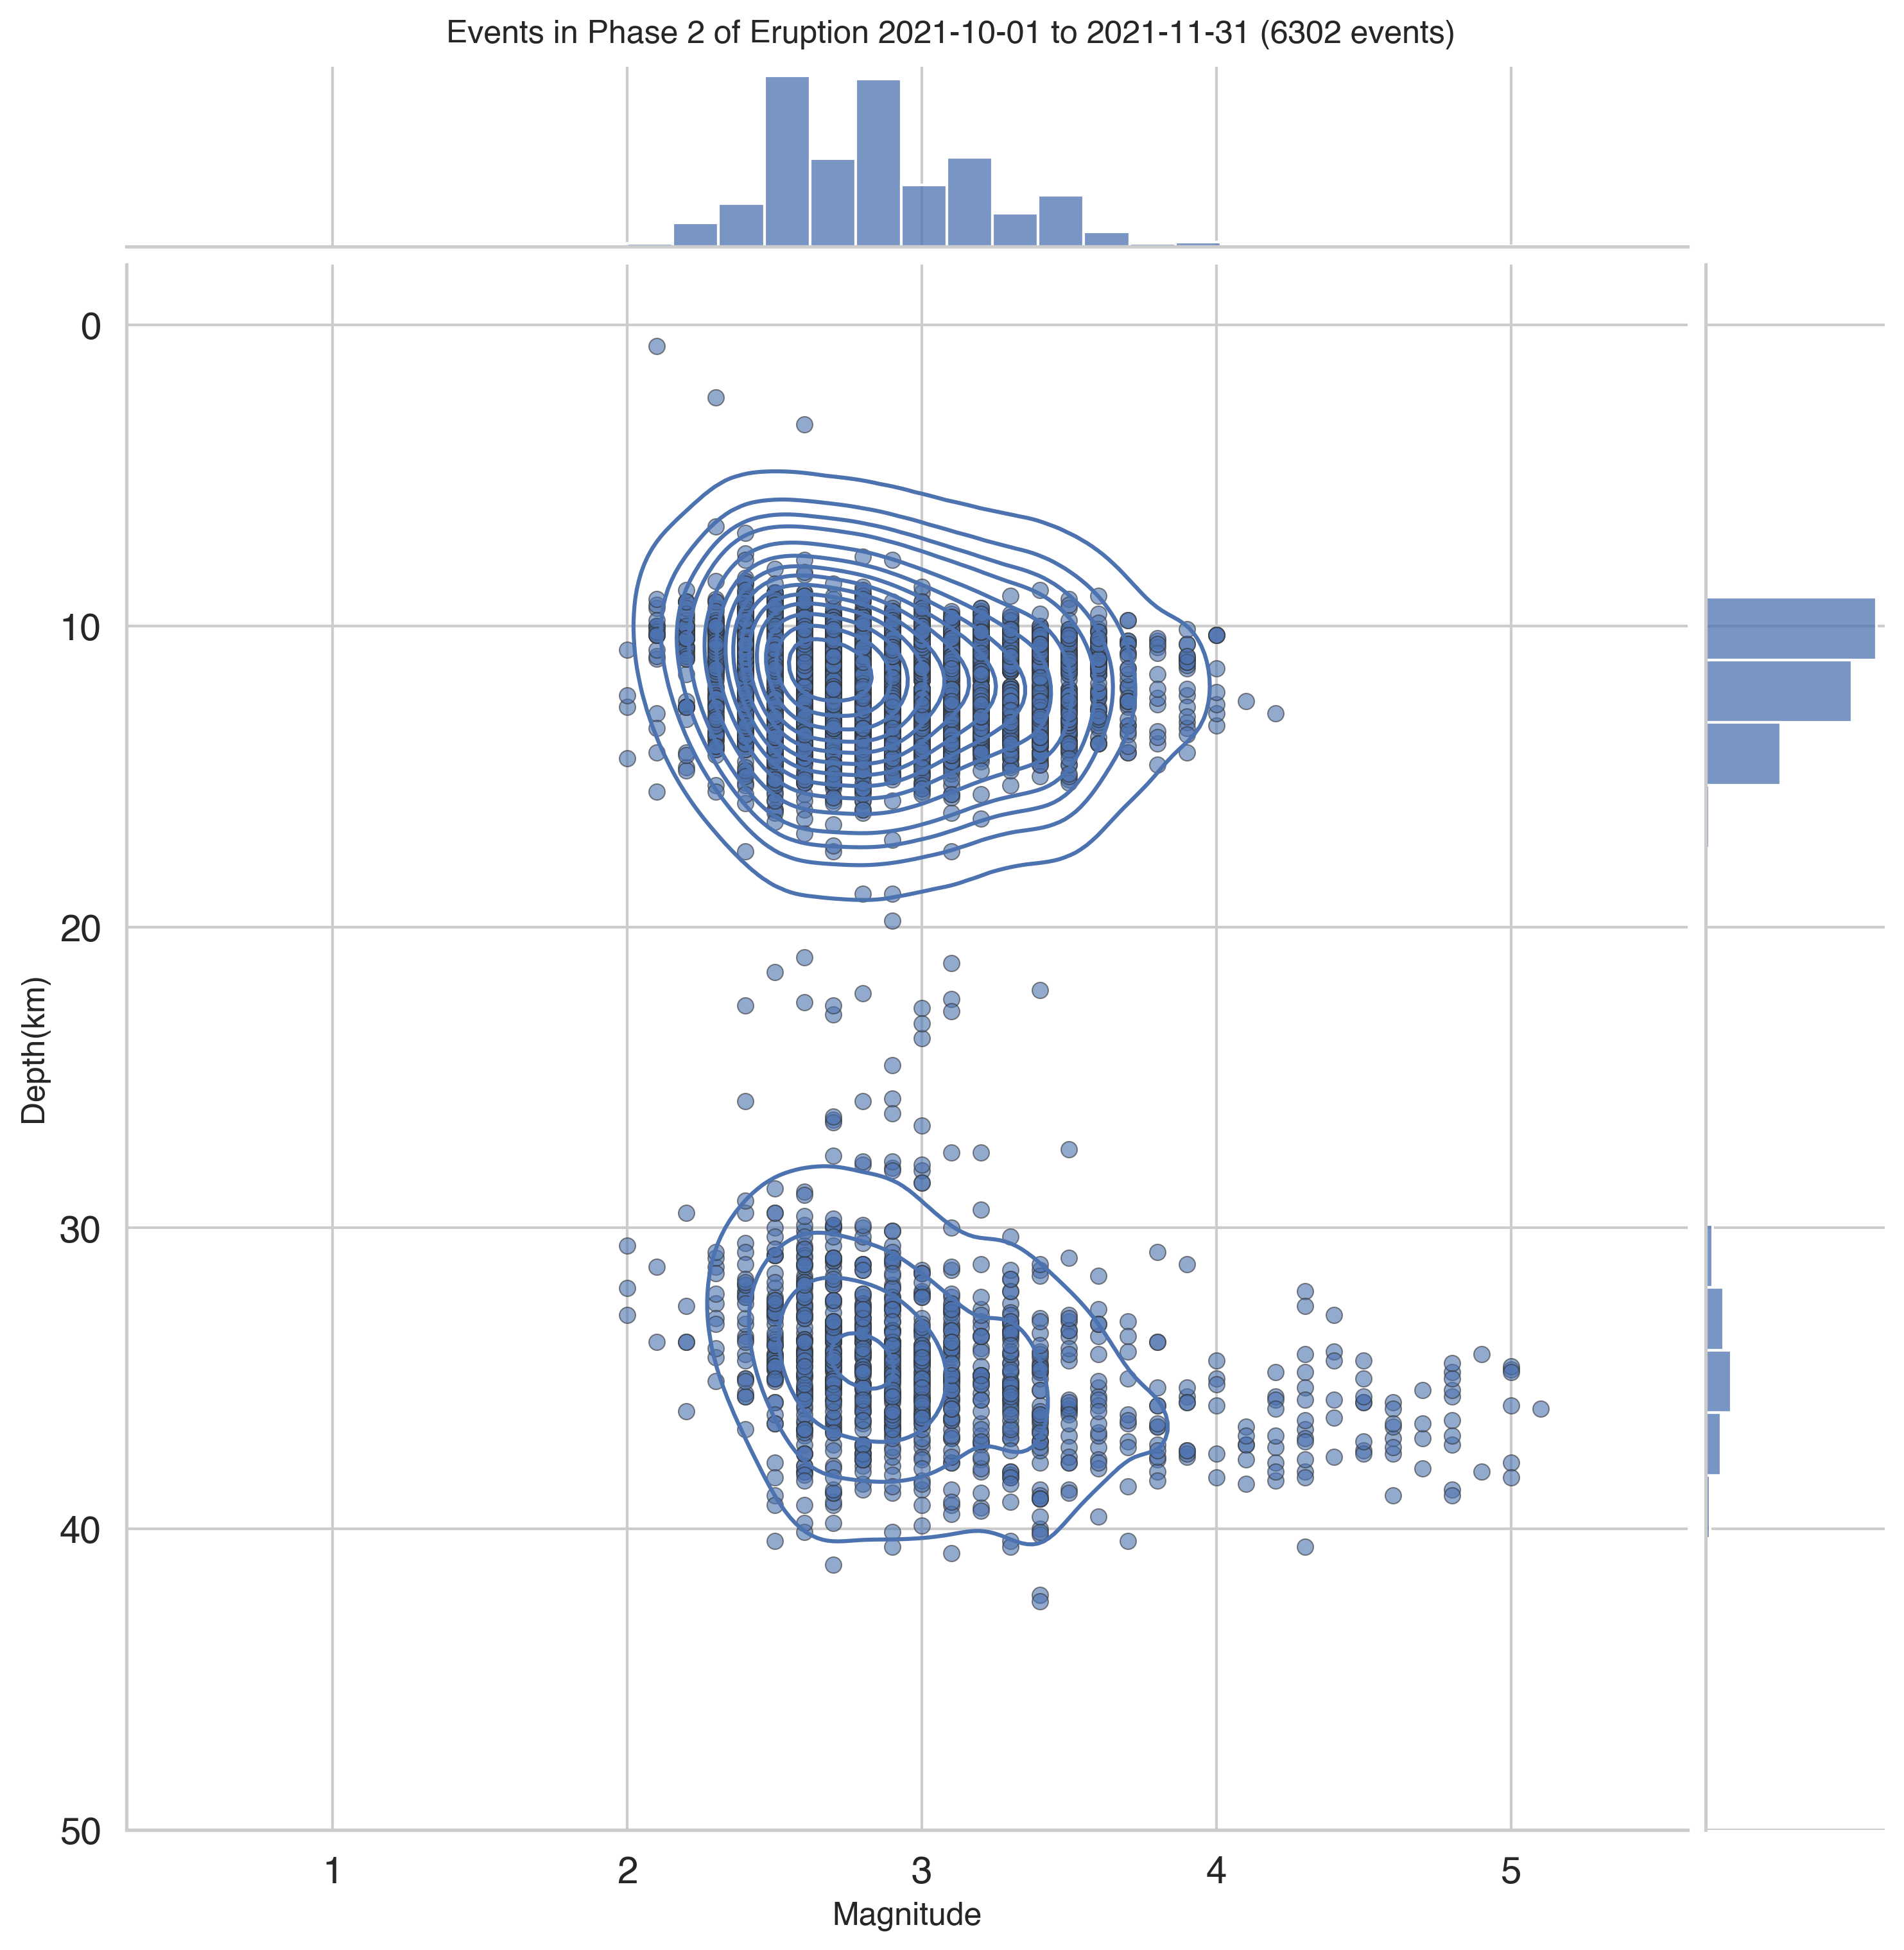

In [13]:
cumulative_events_mag_depth(df_ign_phase2, hue=None)
plt.suptitle(f"Events in Phase 2 of Eruption 2021-10-01 to 2021-11-31 ({len(df_ign_phase2.index)} events)", y=1.01);

/opt/homebrew/Caskroom/miniforge/base/envs/lapalma-earthquakes/lib/python3.10/site-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)


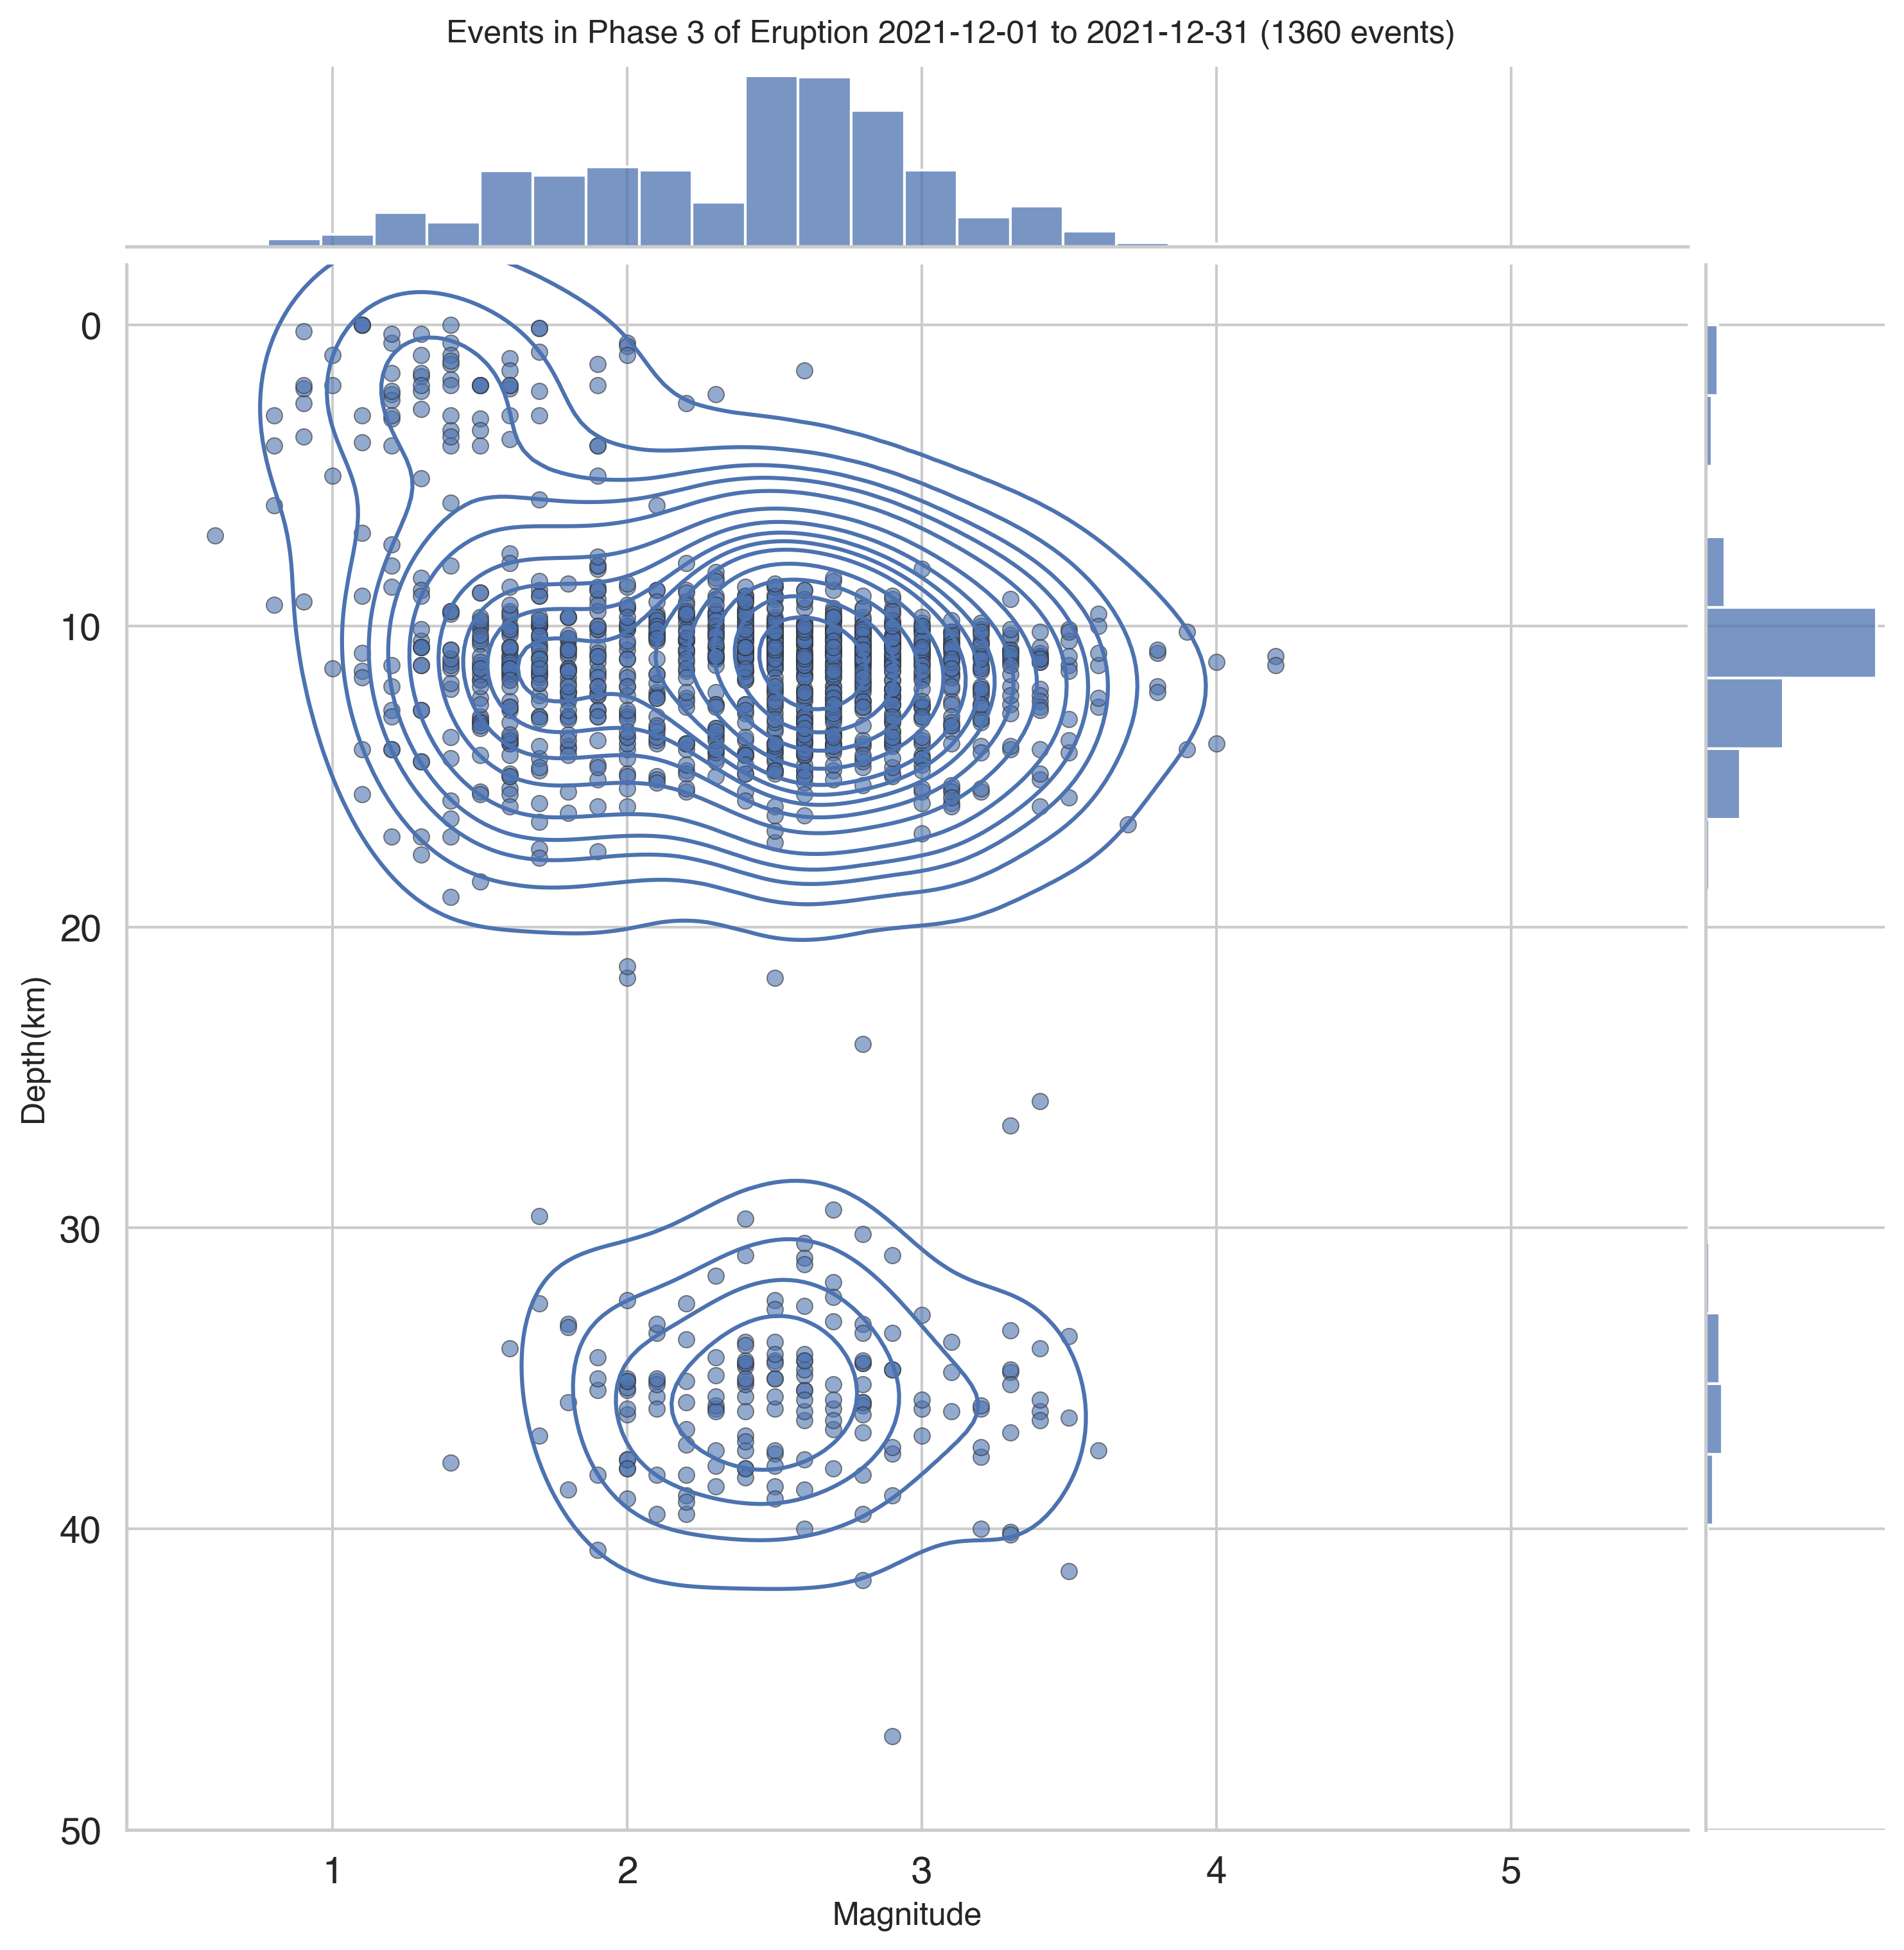

In [14]:
cumulative_events_mag_depth(df_ign_phase3, hue=None)
plt.suptitle(f"Events in Phase 3 of Eruption 2021-12-01 to 2021-12-31 ({len(df_ign_phase3.index)} events)", y=1.01);